<a href="https://colab.research.google.com/github/kemaliksn/PLN-Sentiment-Analysis/blob/main/Sentiment_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import string
nltk.download("punkt")
nltk.download("stopwords")

df = pd.read_csv('sentimen_pln2.csv')
df["content"] = df["content"].astype(str)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kemal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kemal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,userName,score,Date,content
0,Yoakim Nabut,5,12/27/2021 17:16,Mohon lebih cepat lagi konfirmasinya kepda pih...
1,Slamet Raharjo,5,12/27/2021 17:15,"Ibu,Bapak ,mba, abang Pln, ni saya mau menyamp..."
2,Didik prastiawan,5,12/27/2021 17:12,Semoga kinerja semakin memuaskan
3,Neti Neti,5,12/27/2021 17:08,Lebih efektif... Lebih cepat.. Fast respon.. U...
4,Hendra Putra,5,12/27/2021 17:07,App yang bermanfaat


In [ ]:
df

,userName,score,Date,content
0,Yoakim Nabut,5,12/27/2021 17:16,Mohon lebih cepat lagi konfirmasinya kepda pih...
1,Slamet Raharjo,5,12/27/2021 17:15,"Ibu,Bapak ,mba, abang Pln, ni saya mau menyamp..."
2,Didik prastiawan,5,12/27/2021 17:12,Semoga kinerja semakin memuaskan
3,Neti Neti,5,12/27/2021 17:08,Lebih efektif... Lebih cepat.. Fast respon.. U...
4,Hendra Putra,5,12/27/2021 17:07,App yang bermanfaat
...,...,...,...,...
995,Rini Tama,5,12/12/2021 7:46,Mantap cepat tanggap. Dipertahankan terus kine...
996,Aldo Idzam,5,12/12/2021 7:09,"Banyak membantu ,utk byar listrik dll terkait ..."
997,Freddy Angkakusuman,5,12/12/2021 6:58,"PLN, sekarang lebih mudah, modern, dan cepat!!..."
998,mujijatnika akew,5,12/12/2021 3:27,cepet tanggap.. terimakasih sangat membantu da...


VISUALISASI DATA

In [ ]:
sorteddata = df.sort_values(by='Date', ascending=True) #Sort by Newest, change to True if you want to sort by Oldest.
sorteddata.head()

,userName,score,Date,content
986,Wan Gian,5,12/12/2021 10:06,Memudahkan dalam estimasi rencana hitung biaya
985,Hitam Putih,5,12/12/2021 10:10,Pembayaran jadi lebih mudah. Khusus untuk peng...
984,Rabiaton,5,12/12/2021 10:20,PLN m0bile sangat bermanfaat
983,Chandra Kartawan,5,12/12/2021 10:52,"Aplikasi ini sangat membantu sekali, mulai dar..."
982,Yetty Asnidah,5,12/12/2021 10:56,sangat membantu


In [ ]:
sorteddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 986 to 44
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  1000 non-null   object
 1   score     1000 non-null   int64 
 2   Date      1000 non-null   object
 3   content   1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.1+ KB


In [ ]:
sorteddata['score'].value_counts()

5    690
1    150
4     78
3     52
2     30
Name: score, dtype: int64

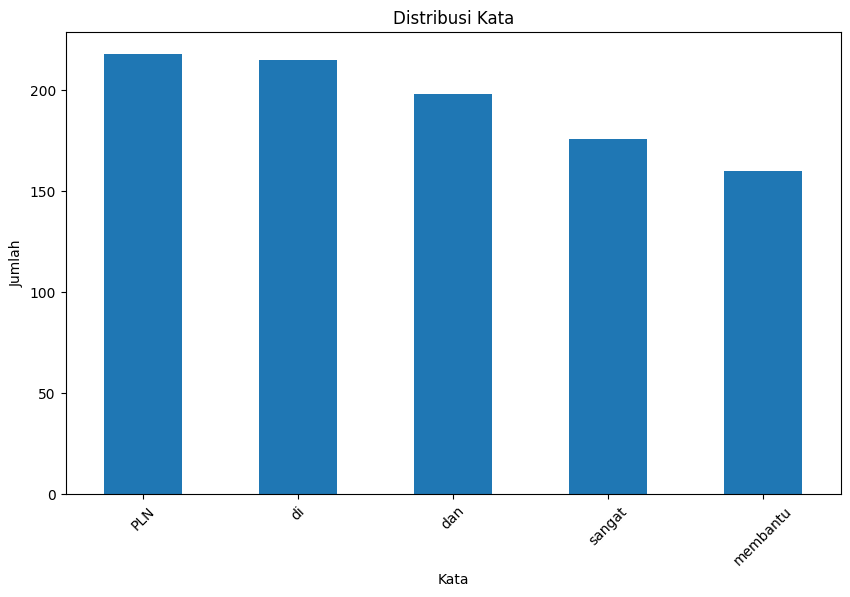

In [ ]:
# Menghitung frekuensi kemunculan kata
word_counts = df['content'].str.split(expand=True).stack().value_counts()

# Memilih 10 kata dengan frekuensi tertinggi
top_words = word_counts.head(5)

# Membuat plot bar distribusi kata
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.title('Distribusi Kata')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='score'>

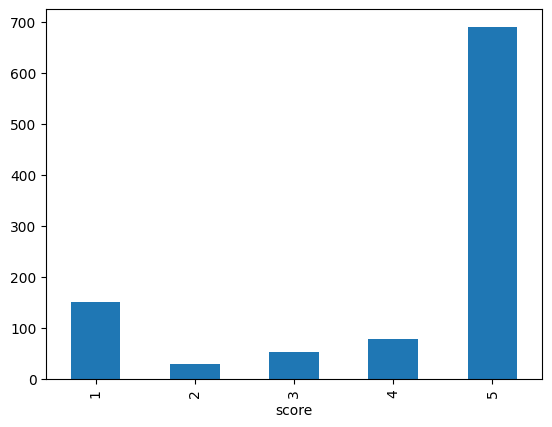

In [ ]:
sorteddata.groupby(['score']).size().plot(kind = "bar")

<Axes: xlabel='score'>

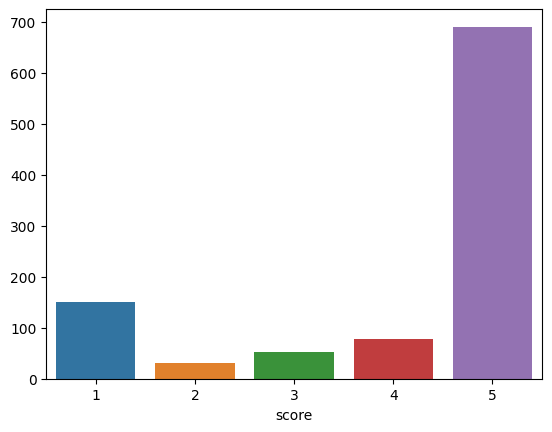

In [ ]:
import seaborn as sns
result = sorteddata.groupby(['score']).size()

# plot the result
sns.barplot(x = result.index, y = result.values)

In [ ]:
#Labeling
sentimen = []
for index, row in df.iterrows():
  if row['score'] > 3:
      sentimen.append ('Positif')
  else  :
      sentimen.append ('Negatif')

df['sentimen'] = sentimen
df_data = df.copy()
df_data = df.drop(columns = ['userName', 'score', 'Date'])
df_data.head()

,content,sentimen
0,Mohon lebih cepat lagi konfirmasinya kepda pih...,Positif
1,"Ibu,Bapak ,mba, abang Pln, ni saya mau menyamp...",Positif
2,Semoga kinerja semakin memuaskan,Positif
3,Lebih efektif... Lebih cepat.. Fast respon.. U...,Positif
4,App yang bermanfaat,Positif


<Axes: xlabel='sentimen'>

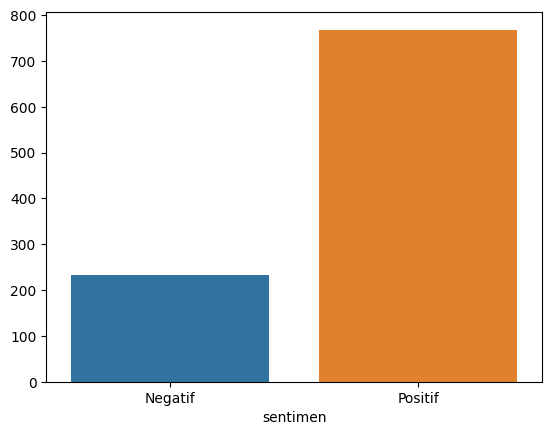

In [ ]:
df_new = df[['sentimen']]

#df_new
result = df_new.groupby(['sentimen']).size()

# plot the result
sns.barplot(x = result.index, y = result.values)

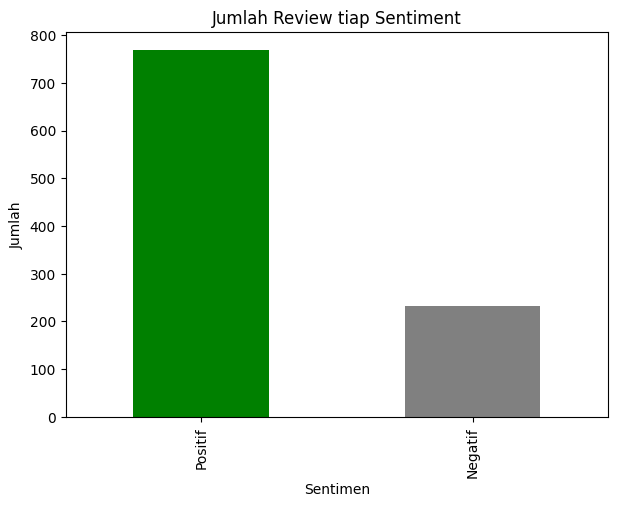

In [ ]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey']
df_new['sentimen'].value_counts().plot(kind='bar',color = color)
plt.title('Jumlah Review tiap Sentiment')
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribusi Sentimen')

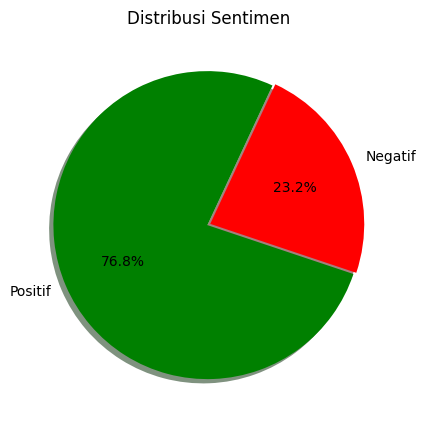

In [ ]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,5))
colors = ('green', 'red')
wp={'linewidth':0, 'edgecolor': 'black'}
tags=df_new['sentimen'].value_counts()
explode = (0.01,0.01)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=65, wedgeprops=wp, explode=explode, label='')
plt.title('Distribusi Sentimen')

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk membersihkan teks dari karakter yang tidak diperlukan
def preprocess_text(text):
    # Menghapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Menghapus karakter non-alfanumerik
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)

    # Menghapus tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Mengubah teks menjadi lowercase
    text = text.lower()

    #regexp
    patterns = {
        r'blm\b': 'belum',
        r'gk\b': 'tidak',
        r'gw\b': 'saya',
        r'emg\b': 'memang',
        r'btw\b': 'by the way',
        r'bnyk\b': 'banyak',
        r'smua\b': 'semua',
        r'aja\b': 'saja',
        r'dgn\b': 'dengan',
        r'gpp\b': 'gak apa-apa',
        r'yg\b': 'yang',
        r'krn\b': 'karena',
        r'dr\b': 'dari',
        r'gt\b': 'begitu',
        r'lg\b': 'lagi',
        r'jd\b': 'jadi',
        r'tp\b': 'tapi',
        r'bgd\b': 'banget',
        r'dlm\b': 'dalam',
        r'jg\b': 'juga',
        r'slbh\b': 'salah',
        r'kyk\b': 'kayak',
        r'bbrp\b': 'beberapa',
        r'klo\b': 'kalau',
        r'sgt\b': 'sangat',
        r'gmna\b': 'bagaimana',
        r'yg\b': 'yang',
        r'terlalu\b': 'terlalu',
        r'org\b': 'orang',
        r'jgn\b': 'jangan',
        r'bngt\b': 'benget',
        r'tp\b': 'tapi',
        r'hrs\b': 'harus',
        r'pd\b': 'pada',
        r'kmrn\b': 'kemarin',
        r'lgsg\b': 'langsung',
        r'mau\b': 'mau',
        r'siap\b': 'siap',
        r'bgitu\b': 'begitu',
        r'dp\b': 'deposit',
        r'min\b': 'minimal',
        r'msk\b': 'masuk',
        r'mkn\b': 'makan',
        r'mlm\b': 'malam',
        r'tlg\b': 'tolong',
        r'yuk\b': 'ayo',
        r'dp\b': 'dalam',
        r'plg\b': 'paling',
        r'sangan\b' : 'sangat',
        # Tambahkan pola regex lainnya sesuai kebutuhan
    }

    for pattern, replacement in patterns.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

    # Tokenisasi kata
    tokens = word_tokenize(text)

    # Menghapus kata-kata yang tidak berguna (stop words)
    stop_words = set(stopwords.words("indonesian"))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Melakukan stemming kata
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Menggabungkan kembali kata-kata yang telah diproses
    preprocessed_text = stemmed_tokens

    return preprocessed_text

# Preprocess kolom teks pada dataset
df_data['processed_text'] = df_data['content'].apply(preprocess_text)

# Tampilkan dataset setelah preprocessing
print(df_data.head())

                                             content sentimen  \
0  Mohon lebih cepat lagi konfirmasinya kepda pih...  Positif   
1  Ibu,Bapak ,mba, abang Pln, ni saya mau menyamp...  Positif   
2                   Semoga kinerja semakin memuaskan  Positif   
3  Lebih efektif... Lebih cepat.. Fast respon.. U...  Positif   
4                                App yang bermanfaat  Positif   

                                      processed_text  
0  [mohon, cepat, konfirmasi, kepda, pln, tuju, t...  
1  [mba, abang, pln, ni, keluh, jaring, wilayah, ...  
2                                [moga, kerja, muas]  
3  [efektif, cepat, fast, respon, untk, wilayah, ...  
4                                     [app, manfaat]  


In [ ]:
df_data

,content,sentimen,processed_text
0,Mohon lebih cepat lagi konfirmasinya kepda pih...,Positif,"[mohon, cepat, konfirmasi, kepda, pln, tuju, t..."
1,"Ibu,Bapak ,mba, abang Pln, ni saya mau menyamp...",Positif,"[mba, abang, pln, ni, keluh, jaring, wilayah, ..."
2,Semoga kinerja semakin memuaskan,Positif,"[moga, kerja, muas]"
3,Lebih efektif... Lebih cepat.. Fast respon.. U...,Positif,"[efektif, cepat, fast, respon, untk, wilayah, ..."
4,App yang bermanfaat,Positif,"[app, manfaat]"
...,...,...,...
995,Mantap cepat tanggap. Dipertahankan terus kine...,Positif,"[mantap, cepat, tanggap, tahan, kerja, layan, ..."
996,"Banyak membantu ,utk byar listrik dll terkait ...",Positif,"[bantu, utk, byar, listrik, dll, kait, listrik..."
997,"PLN, sekarang lebih mudah, modern, dan cepat!!...",Positif,"[pln, mudah, modern, cepat, tolong, lapang, pe..."
998,cepet tanggap.. terimakasih sangat membantu da...,Positif,"[cepet, tanggap, terimakasih, bantu, pelayanna..."


In [ ]:
#df_data.to_csv('data_preprocessed_fix3.csv', index=False)

Wordcloud Sebelum Text Preprocessing

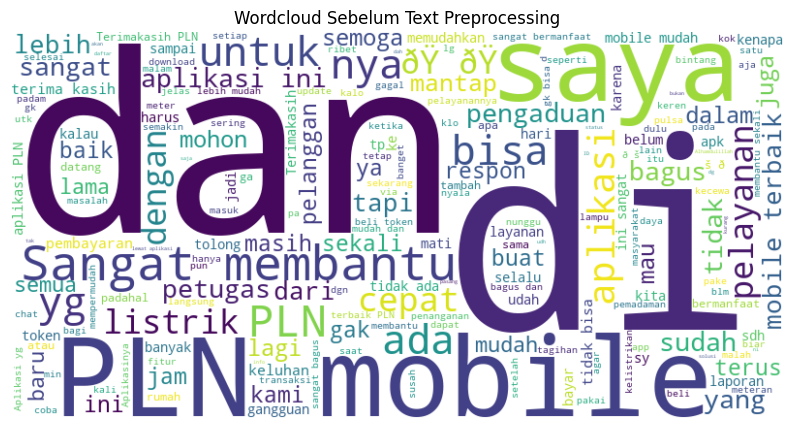

In [ ]:
from wordcloud import WordCloud

# Menggabungkan semua teks menjadi satu string
text_combined = ' '.join(df['content'].tolist())

# Membuat Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Menampilkan Wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sebelum Text Preprocessing')
plt.show()

Wordcloud Setelah Text Preprocessing

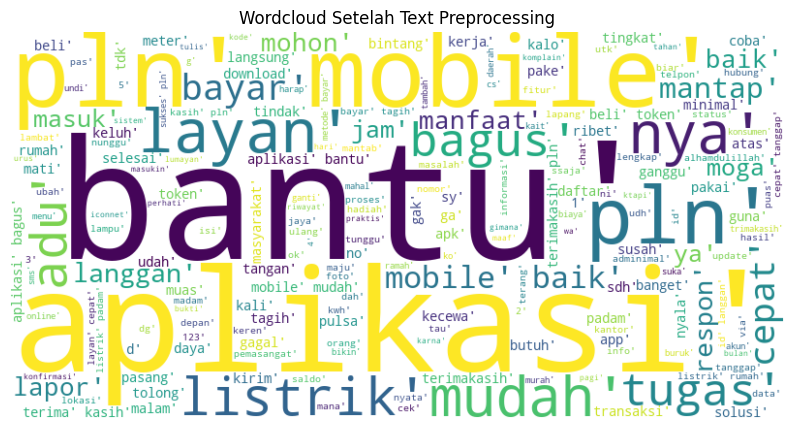

In [ ]:
from wordcloud import WordCloud

df_data["processed_text"] = df_data["processed_text"].astype(str)

# Menggabungkan semua teks menjadi satu string
text_combined = ' '.join(df_data['processed_text'].tolist())

# Membuat Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Menampilkan Wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Setelah Text Preprocessing')
plt.show()

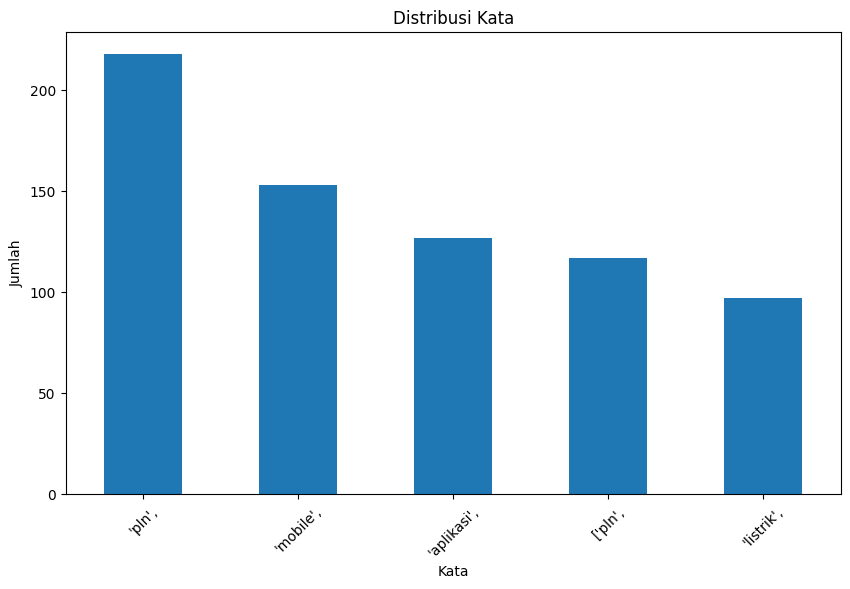

In [ ]:
# Menghitung frekuensi kemunculan kata
word_counts = df_data['processed_text'].str.split(expand=True).stack().value_counts()

# Memilih 10 kata dengan frekuensi tertinggi
top_words = word_counts.head(5)

# Membuat plot bar distribusi kata
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.title('Distribusi Kata')
plt.xticks(rotation=45)
plt.show()

Split Data

In [ ]:
x = df_data.iloc[:, 0].values
y = df_data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train

array(['Mempermudah infodan komunikasi dg PLN', 'Mana hadiah 250 MB nya?',
       'Pelayananya malah tambah ribet.. Sudah laporan sejak pagi tadi jam 9, jikalo listrik rumah padam dikarenakan travo sekitar meletup.. namun tak kunjung datang pula petugasnya.. lelet sekali..',
       'Bermanfaat, hanya saja lebih ditingkatkan lg utk promo internet iconnect agar jangkauannya lebih luas mengingat provider lain sdh lebih jauh didepan.',
       'Sangat membatu', 'Sangat memudahkan', 'Sangat membantu',
       'Sangat membantu',
       'Terima kasih pln cabang pangkalpinang babel, atas bantuan utk kaki palsu tahun 2020. Semoga indonesia semakin tangguh demi kebersamaan.',
       'Parah, lama kali respon nya, telpon 123 pun juga gak ada respon, parah parah',
       'Untuk gangguan cepat di tangani sukses untuk Pln dan tingkatkan untuk pelayanan masyarakat',
       'Hadehh ..ini kapan pemasangan barunya ..bayar udah ,nunggu udah .harus di infoin kapan datangnya ,tanggal brpa pemasangan.saya kan 

In [ ]:
len(x_train)

800

In [ ]:
len(x)

1000

In [ ]:
x_test

array(['Aplikasi ini lengkap dan praktis tinggal nunggu petugasnya langsung datang',
       'Aplikasi yg terbaru keren, good job PLN',
       '. minta pngecekan instalasi di nomor center pln suruh pake apk ini . selesai pasang apk ini ajuan malah di cancel oleh pln nyaðŸ™„ðŸ™„ðŸ™„',
       'PLN mobile sangat mudah',
       'Saya udah daftar dapat ga nih internet gratis nya?',
       'Alhamdulillah dengan adanya applikasi PLN Mobile ini, dapat membantu apabila ada masalah dan mendapatkan informasi yang diinginkan.',
       'Aplikasi yg sangat membantu sekali,tanpa harus keluar rumah dan bebas calo',
       'Hallo PLN Mobile saya mau aktifkan Saldo PLN MOBILE punya susah lagi saya tunggu kode OTP punya lama dan satu Lagi Saya Mau upgrade PLN Mobile punya Sudah Sekali Tolong saya sudah Foto KTP Jelas Foto Selfi juga jelas Ko Data" saya di Tolak Ada apa nih Tolong tingkat Kualitas lagi Terima kasih',
       'Trimakasih PLN, kini "bagaikan jari dengan kuku. Berkat aplikasi ini sy merasa san

In [ ]:
len(x_test)

200

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_data["processed_text"] = df_data["processed_text"].astype(str)

# Menggabungkan semua teks menjadi satu string
text_combined = ' '.join(df_data['processed_text'].tolist())

# Load dataset
texts = df_data['processed_text'].tolist()

# Membuat objek TfidfVectorizer
vectorizer = TfidfVectorizer()

# Melakukan term weighting pada data set teks
term_weights = vectorizer.fit_transform(texts)

# Mendapatkan daftar term yang digunakan sebagai fitur
terms = vectorizer.get_feature_names_out()

# Menampilkan term weighting untuk setiap teks dalam data set
for i in range(term_weights.shape[0]):
    text = texts[i]
    print("Teks:", text)
    print("Term Weighting:")
    for j in range(term_weights.shape[1]):
        term = terms[j]
        weight = term_weights[i, j]
        if weight > 0:
            print(f"- {term}: {weight}")
    print()

Teks: ['mohon', 'cepat', 'konfirmasi', 'kepda', 'pln', 'tuju', 'trima', 'kasih']
Term Weighting:
- cepat: 0.22431318603758174
- kasih: 0.2710844599025347
- kepda: 0.47940802258351256
- konfirmasi: 0.38730203853612516
- mohon: 0.285550100312092
- pln: 0.14077361047980072
- trima: 0.4064157571799476
- tuju: 0.47940802258351256

Teks: ['mba', 'abang', 'pln', 'ni', 'keluh', 'jaring', 'wilayah', 'keluhanya', 'travo', 'pasang', 'ukur', 'anggar', 'travo', '3', 'wiliyah', 'tiang', 'travo', 'dah', 'stanby', 'pasang', 'langgan', 'pasng', 'kwh', '450', 'blum', 'pasang', 'lampu', 'redup', 'mohon', 'bantuanya', 'terima', 'kasih']
Term Weighting:
- 450: 0.1810669339497436
- abang: 0.1810669339497436
- anggar: 0.1810669339497436
- bantuanya: 0.17089227811599078
- blum: 0.17089227811599078
- dah: 0.1382883451762169
- jaring: 0.14963036446246086
- kasih: 0.10238550396269952
- keluh: 0.11311169384215387
- keluhanya: 0.17089227811599078
- kwh: 0.13610490004915993
- lampu: 0.13409632523891346
- langgan: 0

              precision    recall  f1-score   support

     Negatif       0.92      0.28      0.42        40
     Positif       0.85      0.99      0.91       160

    accuracy                           0.85       200
   macro avg       0.88      0.63      0.67       200
weighted avg       0.86      0.85      0.82       200

[[ 11  29]
 [  1 159]]


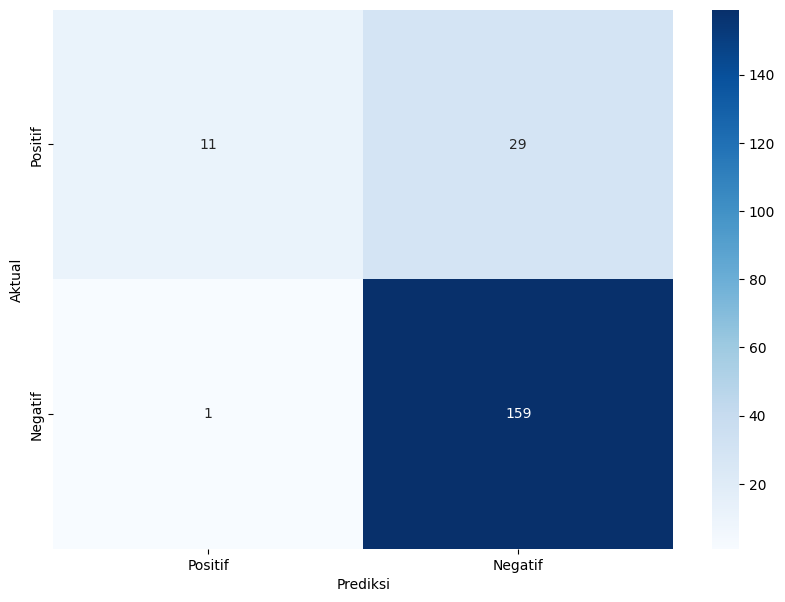

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
texts = df_data['processed_text'].tolist()
labels = df_data['sentimen'].tolist()

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Membuat vektor fitur dengan Term Frequency-Inverse Document Frequency (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Membuat dan melatih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vectors, y_train)

# Melakukan prediksi pada data uji
y_pred = knn_model.predict(X_test_vectors)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasi confusion matrix
class_names = ['Positif', 'Negatif']  # Ganti dengan nama kelas yang sesuai
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()